<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with TensorFlow

_Authors: Justin Pounders (ATL) and Riley Dalles (ATX)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Describe the basic `tensorflow` workflow.
- Create computational graphs representing basic feed-forward neural networks.
- Train neural networks using `tensorflow`
- Create and train neural networks for both regression and classification

In [1]:
#!pip uninstall tensorflow -y
#!pip show tensorflow

In [2]:
#!pip install tensorflow==1.13.1
#!pip show tensorflow

In [3]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

## Computational Graphs

---

Tensorflow is fundamentally a library for creating **computational graphs**.

![](assets/comp_graph.png)

Let's define and evaluate this "computational graph."

**There are two phases to building a `tensorflow` model.**

1. Graph construction
2. Training/evaluation

In [4]:
# Build the graph

a = tf.Variable(3, name='a')
b = tf.Variable(4, name='a')
c = a + b
d = b + 1
e = c * d

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Evaluate the graph

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = e.eval()
    print(result)

35


## Building a Neural Network for Regression

---

Let's start by building a neural net for _regression_.  These are the steps we will follow:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

### Steps 1-4

In [6]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

data = load_boston()
data = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Step 5: Build the network

In [7]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=13, 
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, 
                        units=1,
                        activation=None)

loss = tf.losses.mean_squared_error(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


### Step 6: Train the network

In [8]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(500):
        sess.run(training_op, 
                 feed_dict={X:X_train, y:y_train})
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 8.766008 8.609287
epoch 11 3.0469272 3.017565
epoch 21 1.2581904 1.2113459
epoch 31 0.9329475 0.90491235
epoch 41 0.8964598 0.8678624
epoch 51 0.77653366 0.7525986
epoch 61 0.71718484 0.694636
epoch 71 0.6681214 0.6471714
epoch 81 0.62271506 0.6057706
epoch 91 0.5849308 0.5726033
epoch 101 0.5526815 0.54353905
epoch 111 0.52688235 0.52032125
epoch 121 0.5052734 0.5010014
epoch 131 0.48676783 0.48411128
epoch 141 0.4708474 0.46961674
epoch 151 0.45754716 0.45769167
epoch 161 0.44640586 0.44785592
epoch 171 0.43716112 0.439741
epoch 181 0.4294841 0.4330978
epoch 191 0.42306823 0.42760938
epoch 201 0.4176008 0.42295972
epoch 211 0.41282976 0.41889936
epoch 221 0.40876943 0.41526604
epoch 231 0.4052719 0.41206935
epoch 241 0.402217 0.40929607
epoch 251 0.39955637 0.4069147
epoch 261 0.39722672 0.4048421
epoch 271 0.3951404 0.40302148
epoch 281 0.39323267 0.40140352
epoch 291 0.39152348 0.39996424
epoch 301 0.38999945 0.39863116
epoch 311 0.38863832 0.3974058
epoch 321 0.38740456 0.

In [9]:
metrics.r2_score(y_test, pred)

0.7077858878113524

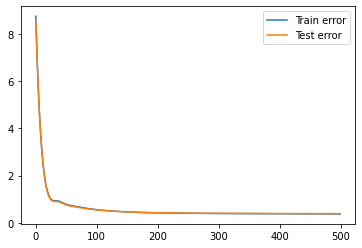

In [10]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

## Building a Neural Network for Binary Classification

---

Now we'll build a neural net for _classification_.  We will follow the same steps as for regression:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propagation.
7. Evaluate performance and iterate.

For _binary classification_ we will have one output unit that will represent the **probability** of "class 1."  Because we want a probability as output, we need to select an activation function that yields values between 0 and 1, i.e., sigmoid function or similar.

In [11]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# 1 = benign
# 0 = malignant

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train*-1 + 1
y_test = y_test*-1 + 1

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [12]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=X_train.shape[1],
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, units=1,
                        name='y_hat',
                        activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

In [13]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(501):
        sess.run(training_op,
                     feed_dict={X:X_train, y:y_train})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.6387633 0.64847827
epoch 11 0.12504847 0.15755431
epoch 21 0.078290716 0.11268138
epoch 31 0.062428813 0.10045332
epoch 41 0.053400267 0.0908084
epoch 51 0.046307188 0.08393338
epoch 61 0.0403485 0.07980677
epoch 71 0.035042435 0.07744216
epoch 81 0.030239623 0.07644205
epoch 91 0.02605488 0.07666324
epoch 101 0.022439646 0.077234745
epoch 111 0.019274924 0.077380955
epoch 121 0.016582472 0.07776121
epoch 131 0.014374987 0.0785972
epoch 141 0.012546456 0.0790155
epoch 151 0.01103523 0.0791237
epoch 161 0.009756436 0.07994299
epoch 171 0.008679709 0.080483094
epoch 181 0.0077468213 0.0804897
epoch 191 0.006933181 0.080979586
epoch 201 0.006212608 0.0816677
epoch 211 0.00557912 0.082303174
epoch 221 0.005028383 0.08307457
epoch 231 0.0045438884 0.0837942
epoch 241 0.0041177575 0.08449109
epoch 251 0.0037432243 0.085204065
epoch 261 0.0034118448 0.08600622
epoch 271 0.0031160787 0.086961955
epoch 281 0.0028600993 0.08790386
epoch 291 0.0026316503 0.08909058
epoch 301 0.002425874

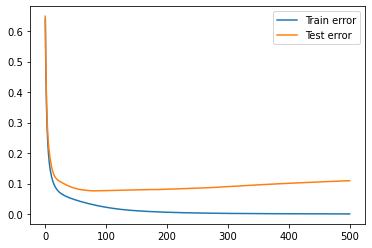

In [14]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

Before moving on, let's go back and add a new hidden layer to our network...

### Batching the input

What if we can't store all of the training data in memory?

We can split the data up into "batches" and feed them to the network one at a time.

In [15]:
kf = KFold(n_splits=2, shuffle=True, random_state=42)

batches = [test for test, _ in kf.split(X_train, y_train)]

In [16]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(101):
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op,
                     feed_dict={X:X_batch, y:y_batch})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.3768439 0.36087793
epoch 11 0.0714488 0.09950546
epoch 21 0.05107274 0.09013767
epoch 31 0.040045716 0.08656746
epoch 41 0.032125287 0.0877009
epoch 51 0.025555944 0.08919564
epoch 61 0.019807762 0.09348834
epoch 71 0.015266014 0.09841517
epoch 81 0.0118141025 0.107879974
epoch 91 0.009299919 0.11493251
epoch 101 0.007418267 0.12336645


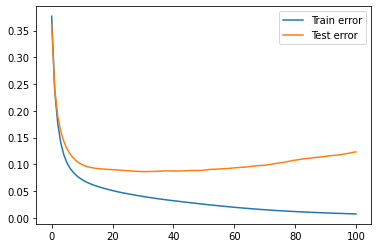

In [17]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [18]:
pred_bin = (pred > 0.5).astype(int)

In [19]:
metrics.accuracy_score(y_test, pred_bin)

0.9790209790209791

In [20]:
metrics.confusion_matrix(y_test, pred_bin)

array([[92,  0],
       [ 3, 48]], dtype=int64)

## Building a Neural Network for Multi-Class Classification

---

In [21]:
from sklearn.datasets import load_iris
import pandas as pd

In [22]:
data = load_iris()

y = data.target
y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(data.data, y)


ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

hidden1 = tf.layers.dense(X, units=X_train.shape[1], 
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, 
                        units=y_train.shape[1],
                        activation=tf.nn.softmax)

loss = tf.losses.softmax_cross_entropy(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)

training_op = optimizer.minimize(loss)

saver = tf.train.Saver()

In [24]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(501):
        sess.run(training_op,
                 feed_dict={X:X_train, y:y_train})
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 10 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
            
    saver.save(sess, './iris.ckpt')
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 1.107857 1.0759689
epoch 11 1.0396755 1.0252764
epoch 21 0.98880965 0.97828984
epoch 31 0.9342766 0.9332445
epoch 41 0.87103385 0.8916174
epoch 51 0.8120714 0.8541352
epoch 61 0.77259296 0.8254249
epoch 71 0.738698 0.79883564
epoch 81 0.7033985 0.7620492
epoch 91 0.6748104 0.72348356
epoch 101 0.6568204 0.69734085
epoch 111 0.6431262 0.67937654
epoch 121 0.6311959 0.6663553
epoch 131 0.62085134 0.6567682
epoch 141 0.61223495 0.64805925
epoch 151 0.60494274 0.64146984
epoch 161 0.5987245 0.635914
epoch 171 0.59371334 0.6296535
epoch 181 0.590139 0.62526435
epoch 191 0.58745414 0.6206932
epoch 201 0.5853738 0.617888
epoch 211 0.58367544 0.61686826
epoch 221 0.5822827 0.6158249
epoch 231 0.5811159 0.614928
epoch 241 0.5801243 0.6140849
epoch 251 0.5792699 0.6133992
epoch 261 0.57852596 0.61272806
epoch 271 0.5778719 0.61208993
epoch 281 0.57729214 0.6114765
epoch 291 0.5767746 0.61091614
epoch 301 0.5763097 0.6103834
epoch 311 0.5758899 0.6098756
epoch 321 0.57550895 0.6093871
epo

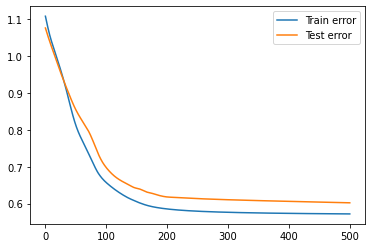

In [25]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [26]:
pred[0], y_test[0]

(array([2.1645034e-08, 6.9511105e-07, 9.9999928e-01], dtype=float32),
 array([0, 0, 1], dtype=uint8))

## Saving Your Model

---

In [27]:
with tf.Session() as sess:
    saver.restore(sess, './iris.ckpt')
    pred = sess.run(y_hat, feed_dict={X:X_test})
    
pred

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./iris.ckpt


array([[2.1645034e-08, 6.9511105e-07, 9.9999928e-01],
       [1.6985346e-04, 9.9981207e-01, 1.8083298e-05],
       [9.9963558e-01, 3.6436488e-04, 3.1560585e-08],
       [2.4478803e-09, 6.0288135e-06, 9.9999392e-01],
       [1.0911635e-04, 9.9941623e-01, 4.7460946e-04],
       [1.0532610e-03, 9.9743062e-01, 1.5161881e-03],
       [9.9961215e-01, 3.8787973e-04, 5.7811100e-08],
       [9.7663351e-06, 8.9541515e-03, 9.9103606e-01],
       [4.0850355e-03, 8.5136980e-01, 1.4454520e-01],
       [1.5433581e-06, 1.0547714e-03, 9.9894375e-01],
       [6.5464783e-04, 7.8293972e-02, 9.2105138e-01],
       [8.1751473e-08, 2.4678808e-05, 9.9997520e-01],
       [9.9792337e-01, 2.0765399e-03, 3.6614427e-08],
       [1.6304894e-04, 9.9849260e-01, 1.3443599e-03],
       [9.9985921e-01, 1.4070800e-04, 4.0100876e-08],
       [1.5261731e-04, 9.9982798e-01, 1.9406314e-05],
       [2.3845691e-05, 5.8018053e-03, 9.9417442e-01],
       [3.8007227e-05, 2.0226192e-01, 7.9770011e-01],
       [4.5218826e-03, 9.935

In [28]:
class_preds = np.empty(pred.shape[0], dtype=np.int32)
for i,clas in enumerate(map(np.argmax, pred)):
    class_preds[i] = clas
    
class_preds

array([2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0])

## Practical Suggestions

---

- In binary classification, start with a single output node with a sigmoid activation function.
- For multi-class classification, have one output node for each class and use the softmax activation function.
- For hidden layers, the ReLU and hyperbolic tangent (tanh) activation functions often work well.  Start with the ReLU as your first trial.
- Start with one hidden layer, then trying adding another if performance is not good.
- For simplicity, start with the same number of units in each hidden layer, then increase this number for all hidden layers simultaneously if the performance is not good.
- Alternatively, you can use the "stretchy pants" approach and through a lot of hidden nodes into your network, but then stop training as soon as you detect the onset of overfitting.

> These suggestions are largely adapted from the book _Hands-on Machine Learning with Scikit-Learn & Tensorflow_ by Aurelien Geron, a book I highly recommend!

In [29]:
#!pip install tensorflow --upgrade

In [30]:
#!pip show tensorflow